Mean Squared Error: 0.26
Root Mean Squared Error: 0.51
R² Score: 0.98


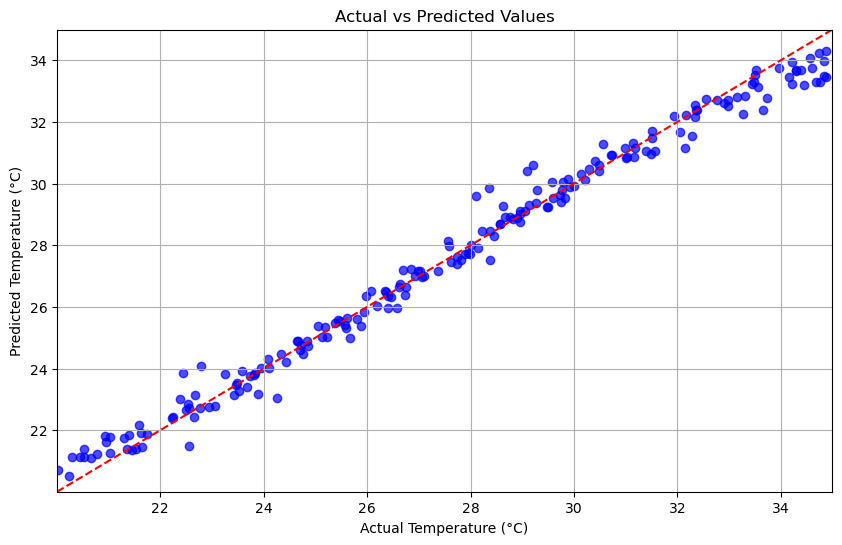

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("battery_dataset.csv")

# Features and target variable
X = df[["Battery Rating (Ah)", "Load Consumed (A)", "Instantaneous Time (minutes)", "Power Consumed (W)", "Voltage Drop (V)"]]
y = df["Temperature (°C)"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualize Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.grid(True)
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.show()


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import joblib

# Load the dataset
df = pd.read_csv("battery_dataset.csv")

# Define features and target
X = df[["Battery Rating (Ah)", "Load Consumed (A)", "Instantaneous Time (minutes)", "Power Consumed (W)", "Voltage Drop (V)"]]
y = df["Temperature (°C)"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'model.pkl')


['model.pkl']

In [18]:
scaler = joblib.load('scaler.pkl')
model = joblib.load('model.pkl')

In [19]:
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)
        
        # Scale the input data
std_data = scaler.transform(input_data_as_numpy_array)
        
        # Make prediction
prediction = model.predict(std_data)
print(prediction)

[21.11954995]


c:\Users\KELLA PAVAN KUMAR\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
